# Exercise 07 : Heatmap

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Finding out if there are different patterns for users between different weekdays and between different hours.

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

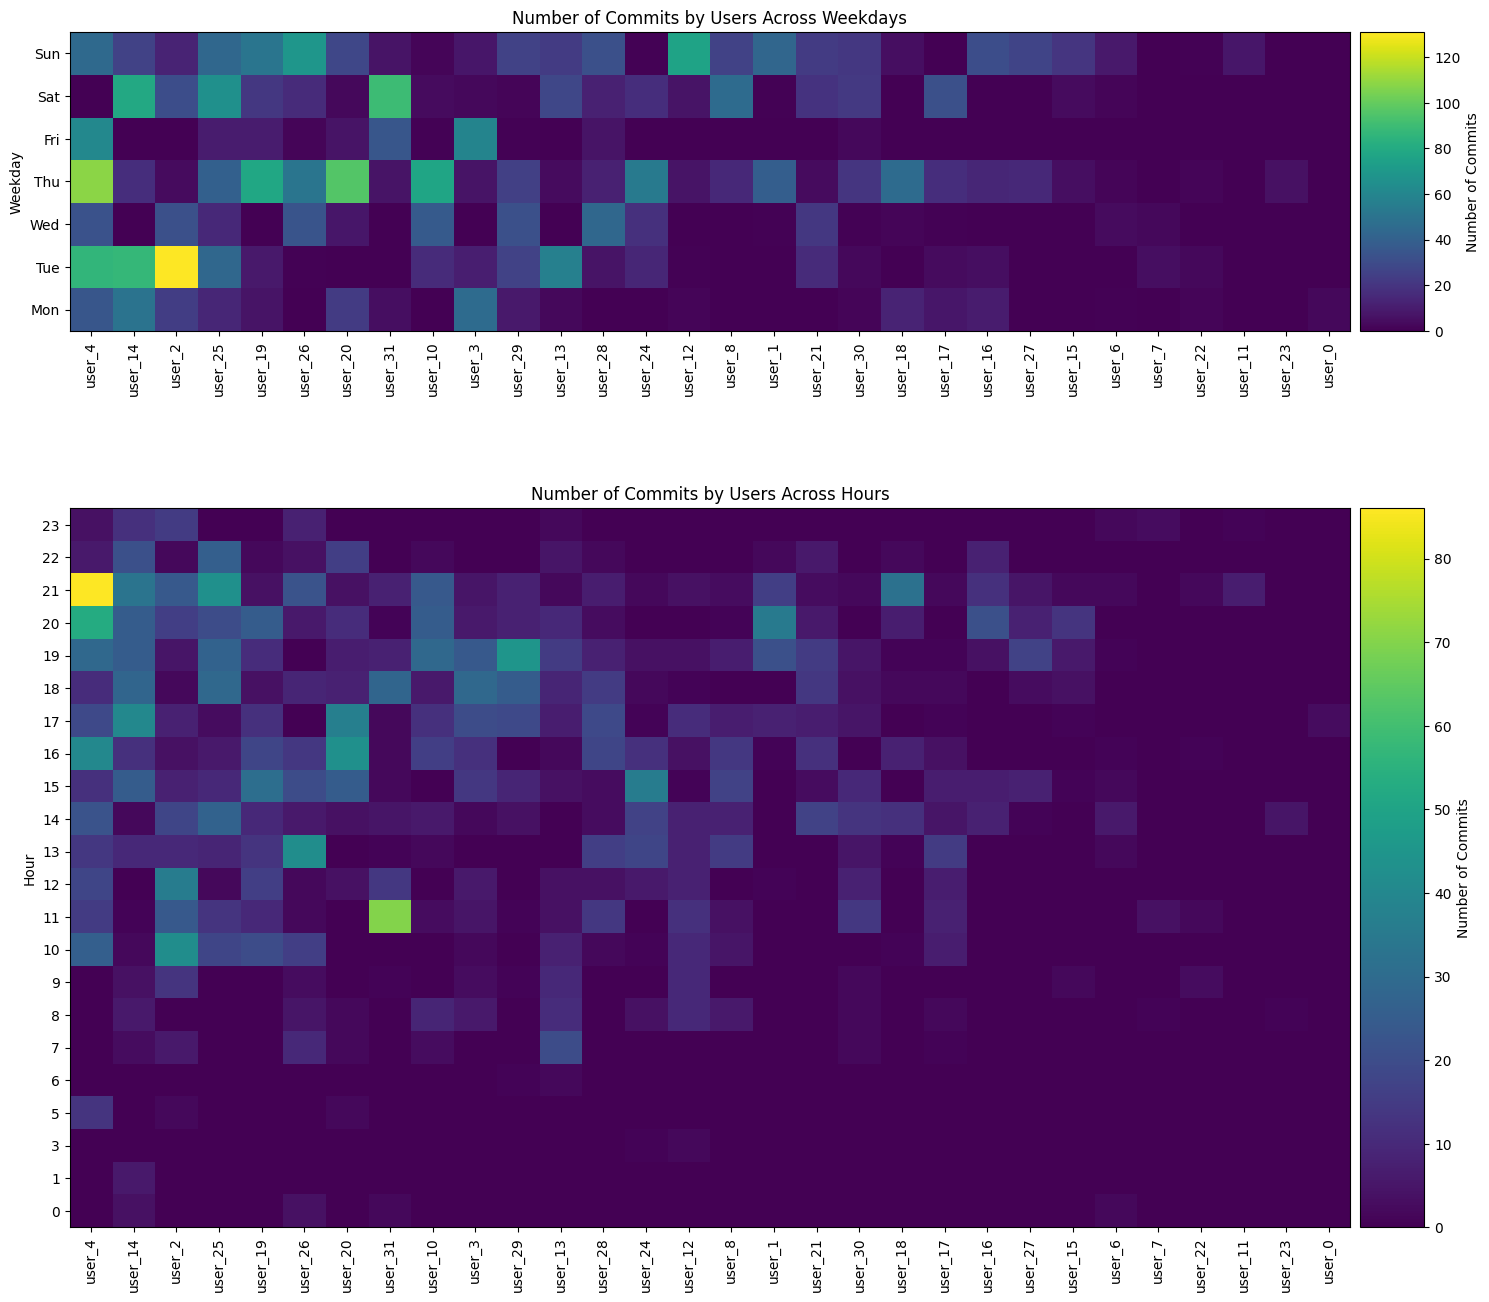

In [3]:
query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
df = pd.read_sql(query, conn)
conn.close()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weekday'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

# Group by user, weekday, hour and count the number of commits
weekday_df= df.groupby(['uid', 'weekday']).size().unstack().fillna(0)
hour_df = df.groupby(['uid', 'hour']).size().unstack().fillna(0)

# Sort by the total number of commits made by each user
weekday_df['total_commits'] = weekday_df.sum(axis=1)
weekday_df = weekday_df.sort_values('total_commits', ascending=False).drop(columns='total_commits').T

hour_df['total_commits'] = hour_df.sum(axis=1)
hour_df = hour_df.sort_values('total_commits', ascending=False).drop(columns='total_commits').T

fig, axs = plt.subplots(2, 1, figsize=(15, 15))

# Weekday heatmap
im1 = axs[0].imshow(weekday_df, cmap='viridis', interpolation='nearest', aspect='equal')
axs[0].set_ylabel('Weekday')
axs[0].set_title('Number of Commits by Users Across Weekdays')
axs[0].set_xticks(range(len(weekday_df.columns)))
axs[0].set_xticklabels(weekday_df.columns, rotation=90)
axs[0].invert_yaxis()
divider1 = make_axes_locatable(axs[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im1, cax=cax1, label='Number of Commits')
axs[0].set_yticks(range(len(weekday_df.index)))
axs[0].set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Hour heatmap
im2 = axs[1].imshow(hour_df, cmap='viridis', interpolation='nearest', aspect='auto')
axs[1].set_ylabel('Hour')
axs[1].set_title('Number of Commits by Users Across Hours')
axs[1].set_xticks(range(len(hour_df.columns)))
axs[1].set_xticklabels(hour_df.columns, rotation=90)
axs[1].invert_yaxis()
divider2 = make_axes_locatable(axs[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.1)
fig.colorbar(im2, cax=cax2, label='Number of Commits')
axs[1].set_yticks(range(len(hour_df.index)))
axs[1].set_yticklabels(hour_df.index)

plt.tight_layout()
plt.show()

#### Which user has the most commits on Tue?
    user_2
#### Which user has the most commits on Thu?
    user_4
#### On which weekday do the users not like making a lot of commits?
    Fri
#### Which user at which hour made the largest number of commits?
    user_4, 21